# Ввод данных и их анализ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import files

In [ ]:
files.upload()

In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
penguins.describe() # общая статистика числовых данных

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins.describe(include=['O']) # общая статистика нечисловых данных

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Заполнение пропусков

In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
penguins[penguins.bill_length_mm.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
penguins.drop(index=3, inplace=True)
penguins.drop(index=271, inplace=True)

penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [ ]:
penguins[penguins.sex.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
penguins.sex.mode()

0    male
dtype: object

In [ ]:
penguins.sex = penguins.sex.fillna('male') # заменим недостающие значения модой
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Визуализация данных

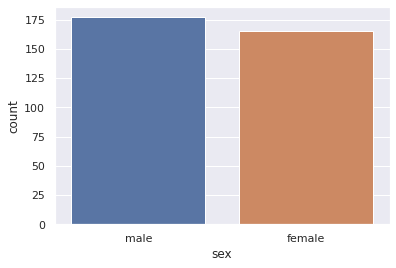

In [ ]:
sns.countplot(x=penguins["sex"])

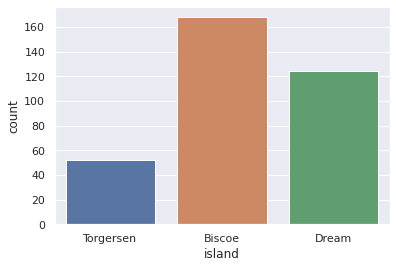

In [ ]:
sns.countplot(x=penguins["island"])

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <a list of 10 Patch objects>)

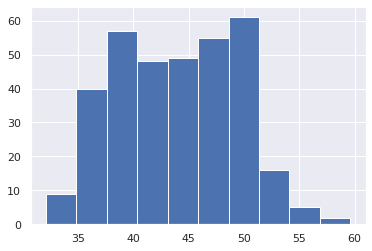

In [ ]:
plt.hist(penguins['bill_length_mm'])

(array([21., 35., 32., 34., 44., 55., 56., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <a list of 10 Patch objects>)

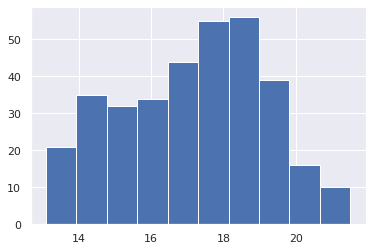

In [ ]:
plt.hist(penguins['bill_depth_mm'])

(array([15., 43., 71., 53., 42., 41., 28., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <a list of 10 Patch objects>)

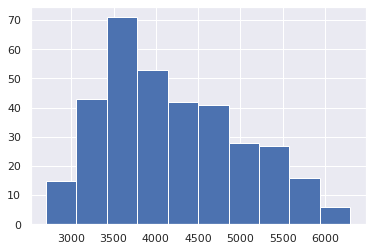

In [ ]:
plt.hist(penguins['body_mass_g'])

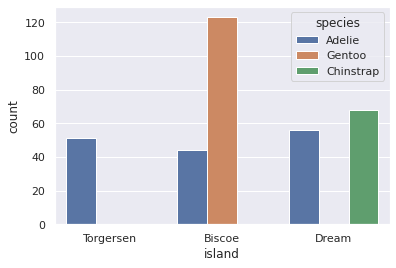

In [ ]:
sns.countplot(data=penguins, x='island', hue='species')

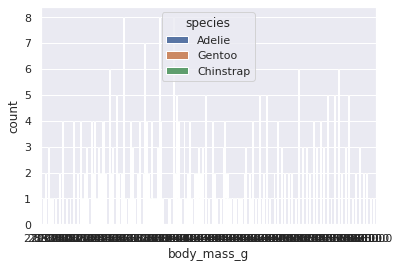

In [ ]:
sns.countplot(data=penguins, x='body_mass_g', hue='species') #для каждого веса выбрались острова
#plt.scatter(x=penguins['body_mass_g'], y = penguins['bill_length_mm'], c = penguins['species'])

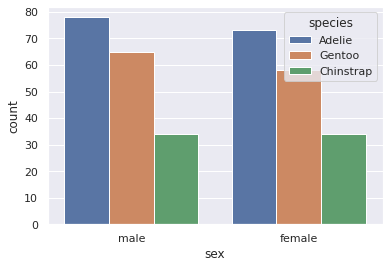

In [ ]:
sns.countplot(data=penguins, x='sex', hue='species')

# Поиск выбросов

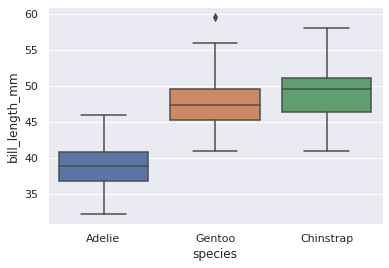

In [ ]:
sns.boxplot(data=penguins, y='bill_length_mm', x='species')

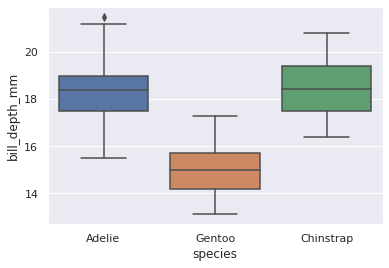

In [ ]:
sns.boxplot(data=penguins, y='bill_depth_mm', x='species')

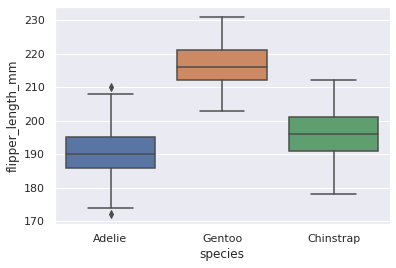

In [ ]:
sns.boxplot(data=penguins, y='flipper_length_mm', x='species')

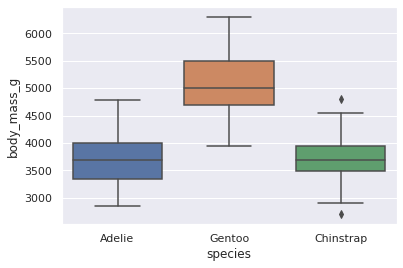

In [ ]:
sns.boxplot(data=penguins, y='body_mass_g', x='species')

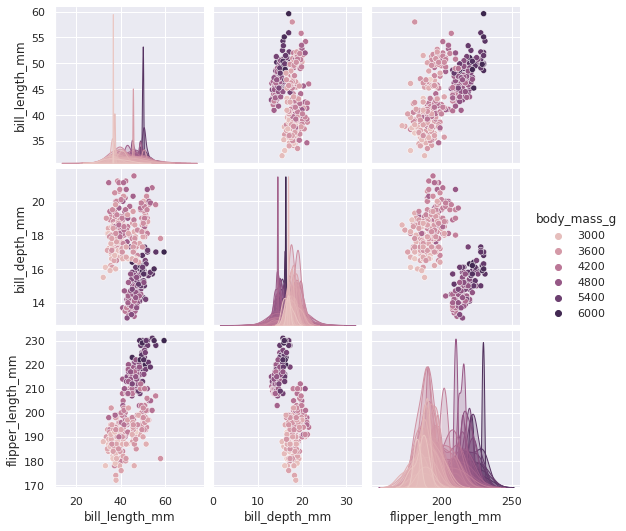

In [ ]:
sns.pairplot(penguins, kind="scatter", hue="body_mass_g")

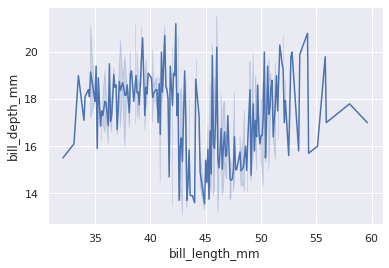

In [ ]:
sns.lineplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

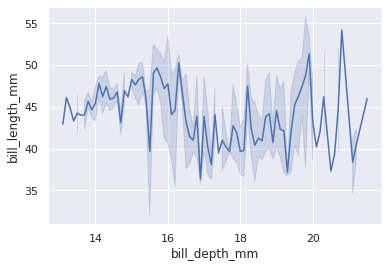

In [ ]:
sns.lineplot(data=penguins, x='bill_depth_mm', y='bill_length_mm')

# Нормализация количественного признака

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler 

scaler_mm = MinMaxScaler()

penguins[['mm_bill_length', 'mm_bill_depth', 'mm_flipper_length', 'mm_body_mass_g']] = scaler_mm.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])


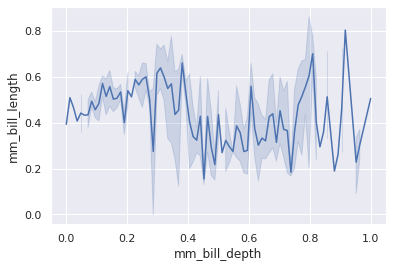

In [ ]:
sns.lineplot(data=penguins, x='mm_bill_depth', y='mm_bill_length')

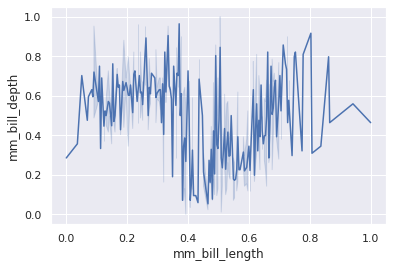

In [ ]:
sns.lineplot(data=penguins, x='mm_bill_length', y='mm_bill_depth')

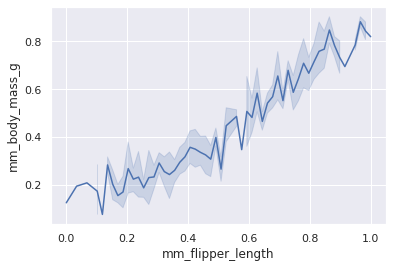

In [ ]:
sns.lineplot(data=penguins, x='mm_flipper_length', y='mm_body_mass_g')

# Кодирование категориальных признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
penguins['sex'] = labelencoder_sex.fit_transform(penguins['sex'])
labelencoder_species = LabelEncoder()
penguins['species'] = labelencoder_species.fit_transform(penguins['species'])
labelencoder_island = LabelEncoder()
penguins['island'] = labelencoder_island.fit_transform(penguins['island'])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,mm_bill_length,mm_bill_depth,mm_flipper_length,mm_body_mass_g
0,0,2,39.1,18.7,181.0,3750.0,1,0.254545,0.666667,0.152542,0.291667
1,0,2,39.5,17.4,186.0,3800.0,0,0.269091,0.511905,0.237288,0.305556
2,0,2,40.3,18.0,195.0,3250.0,0,0.298182,0.583333,0.389831,0.152778
4,0,2,36.7,19.3,193.0,3450.0,0,0.167273,0.738095,0.355932,0.208333
5,0,2,39.3,20.6,190.0,3650.0,1,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,0.861818,0.797619,0.593220,0.361111
340,1,1,43.5,18.1,202.0,3400.0,0,0.414545,0.595238,0.508475,0.194444
341,1,1,49.6,18.2,193.0,3775.0,1,0.636364,0.607143,0.355932,0.298611
342,1,1,50.8,19.0,210.0,4100.0,1,0.680000,0.702381,0.644068,0.388889


# Зависимость признаков

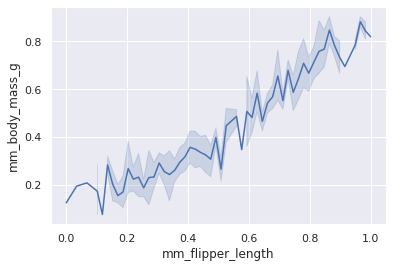

In [ ]:
sns.lineplot(data=penguins, x='mm_flipper_length', y='mm_body_mass_g')

# Тепловая карта

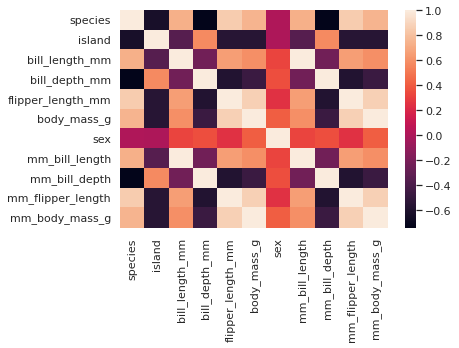

In [ ]:
sns.heatmap(penguins.corr()) #значение коэффициента кореляции

На основе данных и их разведычного анализа можно сделать сделющие выводы:

Параметр sex не играет роли;

Для определения species важными являются Island, bill_depth, flipper_length;


Длина крыльев и масса тела прямопропорциональны.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import files

In [ ]:
files.upload()

In [ ]:
diamond = pd.read_csv('diamonds.csv')
diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamond.describe() # общая статистика числовых данных

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
del diamond['Unnamed: 0']

In [ ]:
diamond.duplicated().sum()

146

In [ ]:
diamond = diamond.drop_duplicates()

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# Визуализация

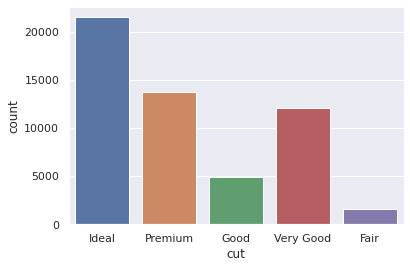

In [ ]:
sns.countplot(x=diamond["cut"])

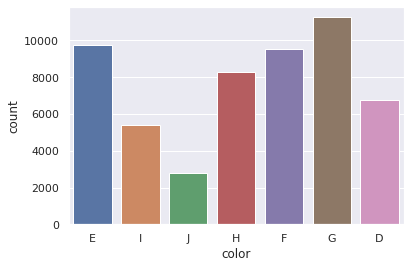

In [ ]:
sns.countplot(x=diamond["color"])

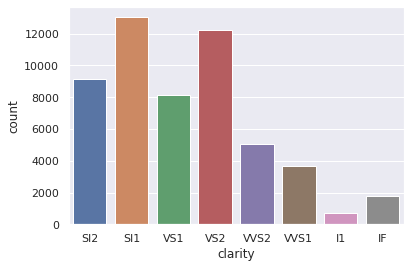

In [ ]:
sns.countplot(x=diamond["clarity"])

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6600e+02, 1.2061e+04,
        4.0248e+04, 1.1210e+03, 7.8000e+01, 4.0000e+00, 2.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <a list of 10 Patch objects>)

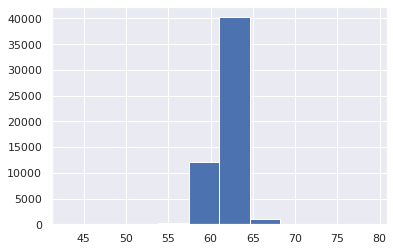

In [ ]:
plt.hist(diamond['depth'])

(array([2.0000e+00, 6.5600e+02, 3.7441e+04, 1.5107e+04, 5.6300e+02,
        2.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([43. , 48.2, 53.4, 58.6, 63.8, 69. , 74.2, 79.4, 84.6, 89.8, 95. ]),
 <a list of 10 Patch objects>)

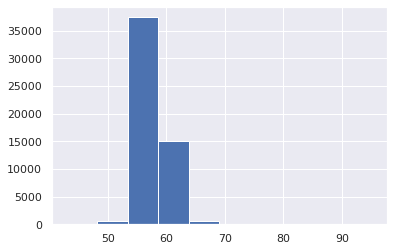

In [ ]:
plt.hist(diamond['table'])

(array([25253.,  9312.,  7376.,  3870.,  2362.,  1737.,  1303.,   999.,
          859.,   723.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

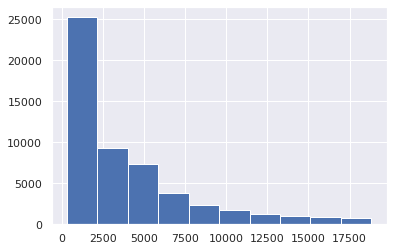

In [ ]:
plt.hist(diamond['price'])

# Поиск и удаление выбросов

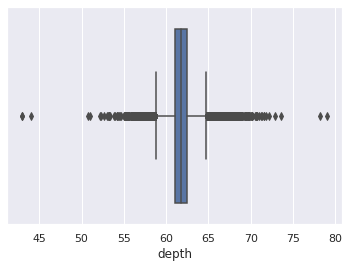

In [ ]:
sns.boxplot(x=diamond['depth'])

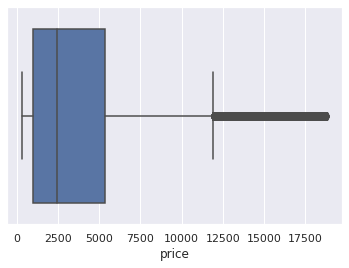

In [ ]:
sns.boxplot(x=diamond['price'])

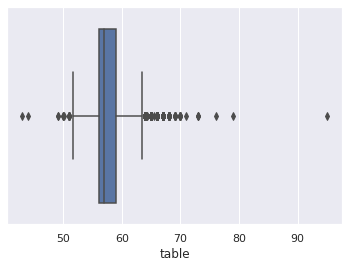

In [ ]:
sns.boxplot(x=diamond['table'])

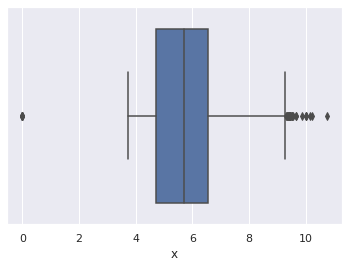

In [ ]:
sns.boxplot(x=diamond['x'])

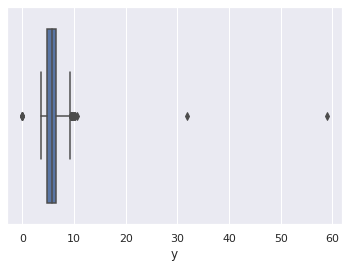

In [ ]:
sns.boxplot(x=diamond['y'])

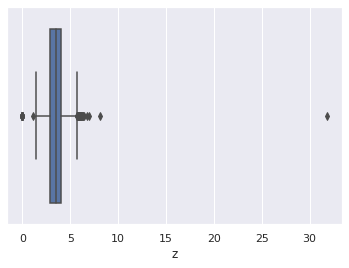

In [ ]:
sns.boxplot(x=diamond['z'])

In [ ]:
#mask = (diamonds['carat'] < 3) & (diamonds['table'] < 61) & (diamonds['table'] > 53)
#diamonds = diamonds[mask]

NameError: ignored

In [ ]:
cut_encoder = { "cut":    {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4},
                "color":  {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6},
                "clarity": {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
              }
diamond = diamond.replace(cut_encoder)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


# Визуалиация зависимых признаков

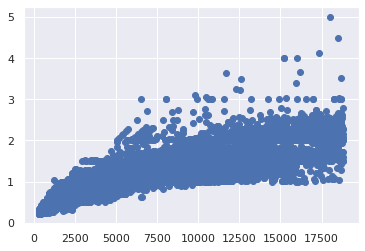

In [ ]:
plt.scatter(diamond['price'], diamond['carat']);

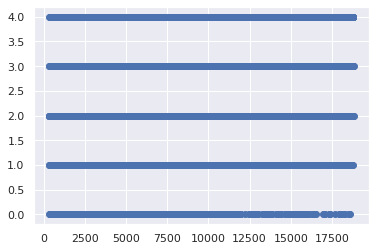

In [ ]:
plt.scatter(diamond['price'], diamond['cut']);

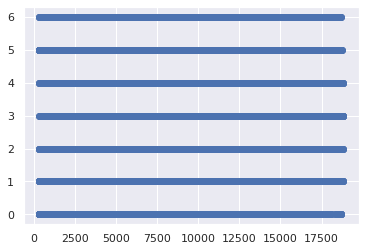

In [ ]:
plt.scatter(diamond['price'], diamond['color']);

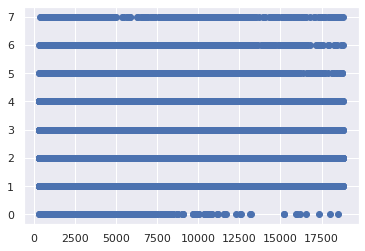

In [ ]:
plt.scatter(diamond['price'], diamond['clarity']);

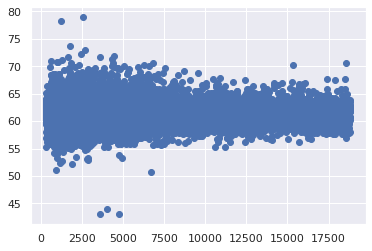

In [ ]:
plt.scatter(diamond['price'], diamond['depth']);

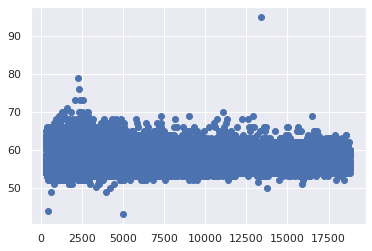

In [ ]:
plt.scatter(diamond['price'], diamond['table']);

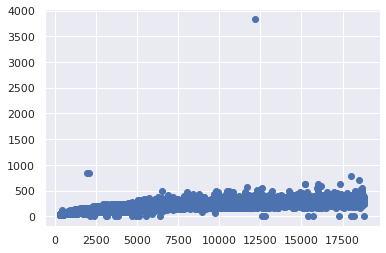

In [ ]:
plt.scatter(diamond['price'], diamond['x'] * diamond['z'] * diamond['y']);

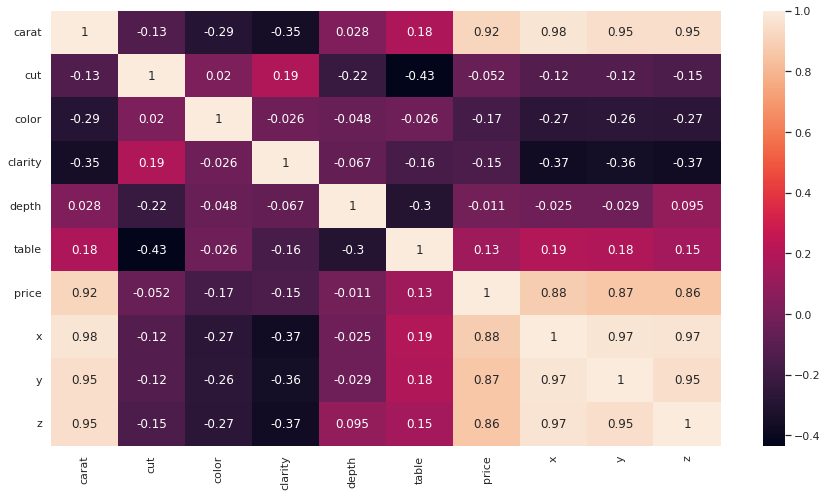

In [ ]:
sns.heatmap(diamond.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

 **Можем сделать вывод, что price линейно зависим от carat, x, y, z (но x,y,z также колерируют с carat )**

# Нормализация

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

diamond[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']] = scaler.fit_transform(diamond[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']])
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,1.00,0.833333,0.142857,0.513889,0.230769,326,0.367784,0.067572,0.076415
1,0.002079,0.75,0.833333,0.285714,0.466667,0.346154,326,0.362197,0.065195,0.072642
2,0.006237,0.25,0.833333,0.571429,0.386111,0.423077,327,0.377095,0.069100,0.072642
3,0.018711,0.75,0.166667,0.428571,0.538889,0.288462,334,0.391061,0.071817,0.082704
4,0.022869,0.25,0.000000,0.142857,0.563889,0.288462,335,0.404097,0.073854,0.086478


# Линейная регрессия

# Разбиение на тренировочную и тестовую выборку


In [ ]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(diamond.price)
x = pd.DataFrame(diamond.carat)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



**MSE**

In [ ]:
from sklearn.metrics import mean_squared_error


# Линейная регрессия

In [ ]:
y = pd.DataFrame(diamond.price)
x = pd.DataFrame(diamond.drop('price', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

model = LinearRegression()

model.fit(X_train, y_train)
model.coef_

array([[52195.65515578,   451.28016228,  1933.45196986,  3492.55484554,
        -3178.75357424, -1509.40145366, -9815.64634827,  1564.26904016,
         -552.34081544]])

In [ ]:
 model.score(X_train, y_train)

0.907450137062342

In [ ]:
model.score(X_test, y_test)

0.9057365999023709

In [ ]:
mean_squared_error(y_train, model.predict(X_train))

1459734.7724574655

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

1548988.1009917492

# Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  

poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y_train)

h_y_pred = poly_model.predict(X_poly)

mean_squared_error(y_train, h_y_pred)

351213.4941486056

In [ ]:

X_poly2 = poly_features.fit_transform(X_test)
h_y_pred2 = poly_model.predict(X_poly2)


mean_squared_error(y_test, h_y_pred2)

2265228.59684823